In [1]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

import qutip as qt
from qutip_qip.circuit import QubitCircuit
from qutip_qip.operations import Gate

from qiit.tqiit import *
from qiit.custom import *

In [2]:
zero_dm = qt.basis(2, 0) * qt.basis(2, 0).dag()
one_dm = qt.basis(2, 1) * qt.basis(2, 1).dag()
mixed_dm = qt.maximally_mixed_dm(2)

plus = (qt.basis(2, 0) + qt.basis(2, 1)) / np.sqrt(2)
minus = (qt.basis(2, 0) - qt.basis(2, 1)) / np.sqrt(2)
plus_dm = plus * plus.dag()
minus_dm = minus * minus.dag()

epr = (qt.basis([2, 2], [0, 0]) + qt.basis([2, 2], [1, 1])) / np.sqrt(2)
epr_dm = epr * epr.dag()

### identity

In [3]:
U = qt.identity([2, 2])

In [5]:
X = tprod(zero_dm, one_dm)
print(qIInkr(qt.to_super(U), X, [0, 1]))
print(qIInsr(qt.to_super(U), X, [0, 1]))
print(qIIntr(qt.to_super(U), X, [0, 1]))
print(qIInbr(qt.to_super(U), X, [0, 1]))
print(qII3(qt.to_super(U), X, [0, 1]))
print(qIInsc(qt.to_super(U), [0, 1]))
print(qIIntc(qt.to_super(U), [0, 1]))

1.922055902288952e-15
1.9721522630525295e-31
0.0
3.650024149988857e-08
0.0
1.4113789311506809e-15
0.0


In [6]:
X = epr_dm
print(qIInkr(qt.to_super(U), X, [0, 1]))
print(qIInsr(qt.to_super(U), X, [0, 1]))
print(qIIntr(qt.to_super(U), X, [0, 1]))
print(qIInbr(qt.to_super(U), X, [0, 1]))
print(qII3(qt.to_super(U), X, [0, 1]))
print(qIInsc(qt.to_super(U), [0, 1]))
print(qIIntc(qt.to_super(U), [0, 1]))

8.008566259537291e-16
-1.6302251256459329e-15
0.0
5.5755039852469285e-08
0.0
1.4113789311506809e-15
0.0


### swap

In [7]:
qc = QubitCircuit(N=2, num_cbits=0)
qc.add_gate('SWAP', targets=[0, 1])
U = qc.compute_unitary()

In [8]:
X = tprod(zero_dm, one_dm)
print(qIInkr(qt.to_super(U), X, [0, 1]))
print(qIInsr(qt.to_super(U), X, [0, 1]))
print(qIIntr(qt.to_super(U), X, [0, 1]))
print(qIInbr(qt.to_super(U), X, [0, 1]))
print(qII3(qt.to_super(U), X, [0, 1]))
print(qIInsc(qt.to_super(U), [0, 1]))
print(qIIntc(qt.to_super(U), [0, 1]))

1.9999999999999993
0.5487949406953989
0.7500000000000001
0.9999999999999999
0.5
0.8285353655857572
0.9375


In [9]:
X = epr_dm
print(qIInkr(qt.to_super(U), X, [0, 1]))
print(qIInsr(qt.to_super(U), X, [0, 1]))
print(qIIntr(qt.to_super(U), X, [0, 1]))
print(qIInbr(qt.to_super(U), X, [0, 1]))
print(qII3(qt.to_super(U), X, [0, 1]))
print(qIInsc(qt.to_super(U), [0, 1]))
print(qIIntc(qt.to_super(U), [0, 1]))

1.9999999999999962
0.548794940695398
0.7499999999999999
1.0000000000000002
0.3750000015662913
0.8285353655857572
0.9375


In [21]:
nkrresults = []
nsrresults = []
ntrresults = []
nbrresults = []
n3results = []
nscresults = []
ntcresults = []

X = tprod(zero_dm, one_dm)

ts = np.linspace(0, 3.14, 500)
for t in tqdm(ts):
    Ut = (1.0j * t * U).expm()
    Ut_super = qt.to_super(Ut)
    nkrresults.append(qIInkr(Ut_super, X, [0, 1]))
    nsrresults.append(qIInsr(Ut_super, X, [0, 1]))
    ntrresults.append(qIIntr(Ut_super, X, [0, 1]))
    nbrresults.append(qIInbr(Ut_super, X, [0, 1]))
    n3results.append(qII3(Ut_super, X, [0, 1]))
    nscresults.append(qIInsc(Ut_super, [0, 1]))
    ntcresults.append(qIIntc(Ut_super, [0, 1]))

  0%|          | 0/500 [00:00<?, ?it/s]

In [22]:
plt.rcParams['text.usetex'] = True

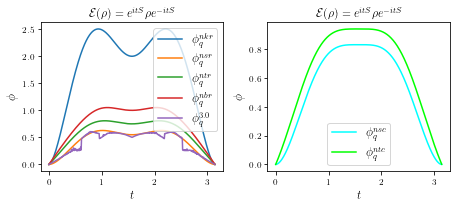

In [28]:
plt.figure(figsize=(6.45, 3.0))

plt.subplot(1, 2, 1)

plt.plot(ts, nkrresults, label=r"$\phi_q^{nkr}$")
plt.plot(ts, nsrresults, label=r"$\phi_q^{nsr}$")
plt.plot(ts, ntrresults, label=r"$\phi_q^{ntr}$")
plt.plot(ts, nbrresults, label=r"$\phi_q^{nbr}$")
plt.plot(ts, n3results, label=r"$\phi_q^{3.0}$")

plt.xlabel(r"$t$", fontsize=12)
plt.ylabel(r"$\phi$", fontsize=12)
plt.title(r"$\mathcal{E}(\rho) = e^{itS} \rho e^{-itS}$", fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(loc='upper right', prop={'size':12})

plt.subplot(1, 2, 2)
plt.plot(ts, nscresults, label=r"$\phi_q^{nsc}$", color='cyan')
plt.plot(ts, ntcresults, label=r"$\phi_q^{ntc}$", color='lime')

plt.xlabel(r"$t$", fontsize=12)
plt.ylabel(r"$\phi$", fontsize=12)
plt.title(r"$\mathcal{E}(\rho) = e^{itS} \rho e^{-itS}$", fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(prop={'size':12})

plt.tight_layout()
plt.savefig('figures/swaptimeseries2pane.pdf')

In [ ]:
# plt.plot(ts, nkresults, label=r"$\phi_q^{nk}$")
plt.plot(ts, nsresults, label=r"$\phi_q^{ns}$", color='orange')
# plt.plot(ts, ntresults, label=r"$\phi_q^{nt}$")
# plt.plot(ts, nbresults, label=r"$\phi_q^{nb}$")
plt.plot(ts, n3results, label=r"$\phi_q^{3.0}$", color='purple')

plt.xlabel(r"$t$", fontsize=20)
plt.ylabel(r"$\phi$", fontsize=20)
plt.title(r"$\mathcal{E}(\rho) = e^{itS} \rho e^{-itS}$", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(prop={'size':15})
plt.tight_layout()
plt.savefig('figures/swaptimeseries-ns-vs-n3.pdf')

### bell

In [29]:
qc = QubitCircuit(N=2, num_cbits=0)
qc.add_gate('SNOT', targets=1)
qc.add_gate('CNOT', controls=1, targets=0)
U = qc.compute_unitary()

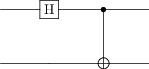

In [30]:
qc.png

In [31]:
U

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.70710678  0.70710678  0.          0.        ]
 [ 0.          0.          0.70710678 -0.70710678]
 [ 0.          0.          0.70710678  0.70710678]
 [ 0.70710678 -0.70710678  0.          0.        ]]

In [32]:
X = tprod(zero_dm, one_dm)
print(qIInkr(qt.to_super(U), X, [0, 1]))
print(qIInsr(qt.to_super(U), X, [0, 1]))
print(qIIntr(qt.to_super(U), X, [0, 1]))
print(qIInbr(qt.to_super(U), X, [0, 1]))
print(qII3(qt.to_super(U), X, [0, 1]))
print(qIInsc(qt.to_super(U), [0, 1]))
print(qIIntc(qt.to_super(U), [0, 1]))

inf
0.7238139441462017
0.8090170031619788
1.000000000000001
0.7529060783505003
0.816738735449724
0.8903882174950656


In [33]:
X = epr_dm
print(qIInkr(qt.to_super(U), X, [0, 1]))
print(qIInsr(qt.to_super(U), X, [0, 1]))
print(qIIntr(qt.to_super(U), X, [0, 1]))
print(qIInbr(qt.to_super(U), X, [0, 1]))
print(qII3(qt.to_super(U), X, [0, 1]))
print(qIInsc(qt.to_super(U), [0, 1]))
print(qIIntc(qt.to_super(U), [0, 1]))

2.000000000000003
0.5487949406953982
0.7499999999999998
0.9999999988333471
0.25000000083249896
0.816738735449724
0.8903882174950656


### Random unitaries

In [35]:
nkrresults = defaultdict(list)

ns = [2, 3, 4, 5]

for n in tqdm(ns):
    X = tprod(*[zero_dm for _ in range(n)])
    for _ in tqdm(range(10), leave=False):
        Ur = qt.rand_unitary(2**n, dims=[[2]*n, [2]*n])
        nkrresults[n].append(qIInkr(qt.to_super(Ur), X, list(range(n))))
    

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
color = 'C0'
for n in ns:
    plt.scatter([n]*len(nkresults[2]), nkresults[n], color=color)

plt.xticks(ns, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, None)
plt.xlabel("Size of system (qubits)", fontsize=15)
plt.ylabel(r"$\phi$", fontsize=20)
plt.title(r"$\phi_q^{nk}$ for random unitaries", fontsize=20)

plt.tight_layout()
plt.savefig('figures/nk-random-unitaries.pdf')

In [36]:
nsrresults = defaultdict(list)

ns = [2, 3, 4, 5]

for n in tqdm(ns):
    X = tprod(*[zero_dm for _ in range(n)])
    for _ in tqdm(range(10), leave=False):
        Ur = qt.rand_unitary(2**n, dims=[[2]*n, [2]*n])
        nsrresults[n].append(qIInsr(qt.to_super(Ur), X, list(range(n))))
    

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
color = 'orange'
for n in ns:
    plt.scatter([n]*len(nsresults[2]), nsresults[n], color=color)

plt.xticks(ns, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, None)
plt.xlabel("Size of system (qubits)", fontsize=15)
plt.ylabel(r"$\phi$", fontsize=20)
plt.title(r"$\phi_q^{ns}$ for random unitaries", fontsize=20)

plt.tight_layout()
plt.savefig('figures/ns-random-unitaries.pdf')

In [37]:
ntrresults = defaultdict(list)

ns = [2, 3, 4, 5]

for n in tqdm(ns):
    X = tprod(*[zero_dm for _ in range(n)])
    for _ in tqdm(range(10), leave=False):
        Ur = qt.rand_unitary(2**n, dims=[[2]*n, [2]*n])
        ntrresults[n].append(qIIntr(qt.to_super(Ur), X, list(range(n))))
    

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
color = 'green'
for n in ns:
    plt.scatter([n]*len(ntresults[2]), ntresults[n], color=color)

plt.xticks(ns, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, None)
plt.xlabel("Size of system (qubits)", fontsize=15)
plt.ylabel(r"$\phi$", fontsize=20)
plt.title(r"$\phi_q^{nt}$ for random unitaries", fontsize=20)

plt.tight_layout()
plt.savefig('figures/nt-random-unitaries.pdf')

In [38]:
nbrresults = defaultdict(list)

ns = [2, 3, 4, 5]

for n in tqdm(ns):
    X = tprod(*[zero_dm for _ in range(n)])
    for _ in tqdm(range(10), leave=False):
        Ur = qt.rand_unitary(2**n, dims=[[2]*n, [2]*n])
        nbrresults[n].append(qIInbr(qt.to_super(Ur), X, list(range(n))))
    

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
color = 'red'
for n in ns:
    plt.scatter([n]*len(ntresults[2]), ntresults[n], color=color)

plt.xticks(ns, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, None)
plt.xlabel("Size of system (qubits)", fontsize=15)
plt.ylabel(r"$\phi$", fontsize=20)
plt.title(r"$\phi_q^{nb}$ for random unitaries", fontsize=20)

plt.tight_layout()
plt.savefig('figures/nb-random-unitaries.pdf')

In [40]:
nscresults = defaultdict(list)

ns = [2, 3, 4]

for n in tqdm(ns):
    X = tprod(*[zero_dm for _ in range(n)])
    for _ in tqdm(range(10), leave=False):
        Ur = qt.rand_unitary(2**n, dims=[[2]*n, [2]*n])
        nscresults[n].append(qIInsc(qt.to_super(Ur), list(range(n))))


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [41]:
ntcresults = defaultdict(list)

ns = [2, 3, 4]

for n in tqdm(ns):
    X = tprod(*[zero_dm for _ in range(n)])
    for _ in tqdm(range(10), leave=False):
        Ur = qt.rand_unitary(2**n, dims=[[2]*n, [2]*n])
        ntcresults[n].append(qIIntc(qt.to_super(Ur), list(range(n))))


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

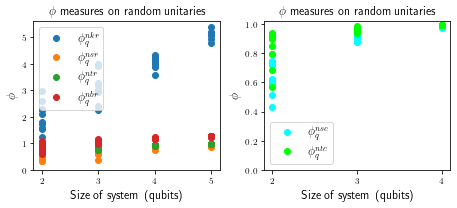

In [49]:
plt.figure(figsize=(6.45, 3.0))

plt.subplot(1, 2, 1)

plt.scatter([2]*10, nkrresults[2], label=r"$\phi_q^{nkr}$", color='C0')
plt.scatter([2]*10, nsrresults[2], label=r"$\phi_q^{nsr}$", color='C1')
plt.scatter([2]*10, ntrresults[2], label=r"$\phi_q^{ntr}$", color='C2')
plt.scatter([2]*10, nbrresults[2], label=r"$\phi_q^{nbr}$", color='C3')

plt.scatter([3]*10, nkrresults[3], color='C0')
plt.scatter([3]*10, nsrresults[3], color='C1')
plt.scatter([3]*10, ntrresults[3], color='C2')
plt.scatter([3]*10, nbrresults[3], color='C3')

plt.scatter([4]*10, nkrresults[4], color='C0')
plt.scatter([4]*10, nsrresults[4], color='C1')
plt.scatter([4]*10, ntrresults[4], color='C2')
plt.scatter([4]*10, nbrresults[4], color='C3')

plt.scatter([5]*10, nkrresults[5], color='C0')
plt.scatter([5]*10, nsrresults[5], color='C1')
plt.scatter([5]*10, ntrresults[5], color='C2')
plt.scatter([5]*10, nbrresults[5], color='C3')


plt.xticks([2, 3, 4, 5], fontsize=9)
plt.yticks(fontsize=9)
plt.ylim(0, None)
plt.xlabel(r"Size of system (qubits)", fontsize=12)
plt.ylabel(r"$\phi$", fontsize=12)
plt.title(r"$\phi$ measures on random unitaries", fontsize=12)
# plt.xlabel(r"$t$", fontsize=20)
# plt.ylabel(r"$\phi$", fontsize=20)
# plt.title(r"$\mathcal{E}(\rho) = e^{itS} \rho e^{-itS}$", fontsize=20)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)

plt.legend(loc='upper left', prop={'size':12})


plt.subplot(1, 2, 2)

plt.scatter([2]*10, nscresults[2], label=r"$\phi_q^{nsc}$", color='cyan')
plt.scatter([2]*10, ntcresults[2], label=r"$\phi_q^{ntc}$", color='lime')

plt.scatter([3]*10, nscresults[3], color='cyan')
plt.scatter([3]*10, ntcresults[3], color='lime')

plt.scatter([4]*10, nscresults[4], color='cyan')
plt.scatter([4]*10, ntcresults[4], color='lime')

plt.xticks([2, 3, 4], fontsize=9)
plt.yticks(fontsize=9)
plt.ylim(0, None)
plt.xlabel(r"Size of system (qubits)", fontsize=12)
plt.ylabel(r"$\phi$", fontsize=12)
plt.title(r"$\phi$ measures on random unitaries", fontsize=12)
plt.legend(prop={'size':12})

plt.tight_layout()
plt.savefig('figures/all-random-unitaries-2pane.pdf')

In [ ]:
n3results = defaultdict(list)

ns = [2, 3, 4, 5]

for n in tqdm(ns):
    X = tprod(*[zero_dm for _ in range(n)])
    for _ in tqdm(range(20), leave=False):
        Ur = qt.rand_unitary(2**n, dims=[[2]*n, [2]*n])
        n3results[n].append(qII3(qt.to_super(Ur), X, list(range(n))))
    

In [ ]:
color = 'purple'
for n in ns:
    plt.scatter([n]*len(n3[2]), n3[n], color=color)

plt.xticks(ns, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, None)
plt.xlabel("Size of system (qubits)", fontsize=15)
plt.ylabel(r"$\phi$", fontsize=20)
plt.title(r"$\phi_q^{3.0}$ for random unitaries", fontsize=20)

plt.savefig('figures/n3-random-unitaries.pdf')

### qft

In [4]:
from qutip.qip.algorithms import qft

In [ ]:
ns = [2, 3, 4, 5]

nkresults = []
nsresults = []
ntresults = []
nbresults = []
for n in tqdm(ns):
    X = tprod(*[zero_dm for _ in range(n)])
    U = qft.qft(n)
    nkresults.append(qIInk(qt.to_super(U), X, list(range(n))))
    nsresults.append(qIIns(qt.to_super(U), X, list(range(n))))
    ntresults.append(qIInt(qt.to_super(U), X, list(range(n))))
    nbresults.append(qIInb(qt.to_super(U), X, list(range(n))))
    


In [ ]:
plt.plot(ns, nkresults, label=r"$\phi_q^{nk}$", color='blue')
plt.plot(ns, nsresults, label=r"$\phi_q^{ns}$", color='orange')
plt.plot(ns, ntresults, label=r"$\phi_q^{nt}$", color='green')
plt.plot(ns, nbresults, label=r"$\phi_q^{nb}$", color='red')

plt.xticks(ns, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, None)
plt.xlabel("Size of system (qubits)", fontsize=15)
plt.ylabel(r"$\phi$", fontsize=20)
plt.title(r"$\phi$ measures on QFT", fontsize=20)

plt.legend(loc='upper left', prop={'size':15})
plt.tight_layout()
plt.savefig('figures/qft-scaling.pdf')

In [ ]:
ns = [2, 3, 4, 5]

nkresults = []
nsresults = []
ntresults = []
nbresults = []
for n in tqdm(ns):
    X = tprod(*[plus_dm for _ in range(n)])
    U = qft.qft(n)
    nkresults.append(qIInk(qt.to_super(U), X, list(range(n))))
    nsresults.append(qIIns(qt.to_super(U), X, list(range(n))))
    ntresults.append(qIInt(qt.to_super(U), X, list(range(n))))
    nbresults.append(qIInb(qt.to_super(U), X, list(range(n))))
    


In [ ]:
plt.plot(ns, nkresults, label=r"$\phi_q^{nk}$", color='blue')
plt.plot(ns, nsresults, label=r"$\phi_q^{ns}$", color='orange')
plt.plot(ns, ntresults, label=r"$\phi_q^{nt}$", color='green')
plt.plot(ns, nbresults, label=r"$\phi_q^{nb}$", color='red')

plt.xticks(ns, fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, None)
plt.xlabel("Size of system (qubits)", fontsize=15)
plt.ylabel(r"$\phi$", fontsize=20)
plt.title(r"$\phi$ measures on QFT", fontsize=20)

plt.legend(loc='upper left', prop={'size':15})
plt.tight_layout()
plt.savefig('figures/qft-scaling-pluses.pdf')

In [52]:
ns = [2, 3, 4]

nkrresults = defaultdict(list)
nsrresults = defaultdict(list)
ntrresults = defaultdict(list)
nbrresults = defaultdict(list)

for n in tqdm(ns):
    for _ in tqdm(range(10), leave=False):
#     X = tprod(*[plus_dm for _ in range(n)])
        X = qt.rand_dm(2**n, dims=[[2]*n, [2]*n])
        U = qft.qft(n)
        nkrresults[n].append(qIInkr(qt.to_super(U), X, list(range(n))))
        nsrresults[n].append(qIInsr(qt.to_super(U), X, list(range(n))))
        ntrresults[n].append(qIIntr(qt.to_super(U), X, list(range(n))))
        nbrresults[n].append(qIInbr(qt.to_super(U), X, list(range(n))))

ns = [2, 3, 4]

nscresults = []
ntcresults = []

for n in tqdm(ns):
    U = qft.qft(n)
    nscresults.append(qIInsc(qt.to_super(U), list(range(n))))
    ntcresults.append(qIIntc(qt.to_super(U), list(range(n))))


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

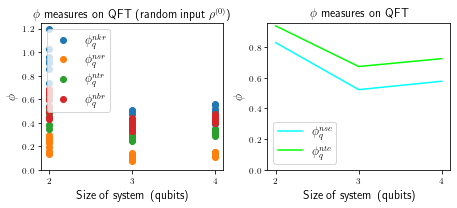

In [59]:
plt.figure(figsize=(6.45, 3.0))

plt.subplot(1, 2, 1)

plt.scatter([2]*10, nkrresults[2], label=r"$\phi_q^{nkr}$", color='C0')
plt.scatter([2]*10, nsrresults[2], label=r"$\phi_q^{nsr}$", color='C1')
plt.scatter([2]*10, ntrresults[2], label=r"$\phi_q^{ntr}$", color='C2')
plt.scatter([2]*10, nbrresults[2], label=r"$\phi_q^{nbr}$", color='C3')

plt.scatter([3]*10, nkrresults[3], color='C0')
plt.scatter([3]*10, nsrresults[3], color='C1')
plt.scatter([3]*10, ntrresults[3], color='C2')
plt.scatter([3]*10, nbrresults[3], color='C3')

plt.scatter([4]*10, nkrresults[4], color='C0')
plt.scatter([4]*10, nsrresults[4], color='C1')
plt.scatter([4]*10, ntrresults[4], color='C2')
plt.scatter([4]*10, nbrresults[4], color='C3')


plt.xticks(ns, fontsize=9)
plt.yticks(fontsize=9)
plt.ylim(0, None)
plt.xlabel(r"Size of system (qubits)", fontsize=12)
plt.ylabel(r"$\phi$", fontsize=12)
plt.title(r"$\phi$ measures on QFT (random input $\rho^{(0)}$)", fontsize=12)
# plt.xlabel(r"$t$", fontsize=20)
# plt.ylabel(r"$\phi$", fontsize=20)
# plt.title(r"$\mathcal{E}(\rho) = e^{itS} \rho e^{-itS}$", fontsize=20)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)

plt.legend(loc='upper left', prop={'size':12})


plt.subplot(1, 2, 2)
plt.plot(ns, nscresults, label=r"$\phi_q^{nsc}$", color='cyan')
plt.plot(ns, ntcresults, label=r"$\phi_q^{ntc}$", color='lime')

plt.xticks(ns, fontsize=9)
plt.yticks(fontsize=9)
plt.ylim(0, None)
plt.xlabel(r"Size of system (qubits)", fontsize=12)
plt.ylabel(r"$\phi$", fontsize=12)
plt.title(r"$\phi$ measures on QFT", fontsize=12)
plt.legend(loc='lower left', prop={'size':12})

plt.tight_layout()
plt.savefig('figures/qft-scaling-randomdms-2pane.pdf')

In [6]:
n = 5
X = qt.rand_dm(2**n, dims=[[2]*n, [2]*n])
U = qft.qft(n)
print(qIInsr(qt.to_super(U), X, list(range(n))))

(0.12308032702531646, ([2], [0, 1, 3, 4]))


In [7]:
n = 5
U = tprod(*[qt.sigmaz() for _ in range(n)])
X = tprod(*[plus_dm for _ in range(n)])

In [12]:
ts = np.linspace(0, 3.1415 / 2, 20)
results = []
for t in tqdm(ts):
    expU = (1.0j * t * U).expm()
    results.append(qIInsr(qt.to_super(expU), X, list(range(n))))

  0%|          | 0/20 [00:00<?, ?it/s]

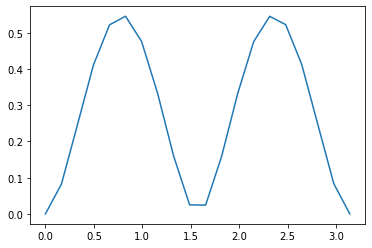

In [13]:
plt.plot(ts, results)